In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as  np
import pandas as pd
import matplotlib.pylab as plt
import logging

logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv(r'D:\Funiversity\Sem5\ML\M04\credit_card.csv')

In [2]:
print("data null \n", credit.isnull().sum())
print("data kosong \n", credit.empty)
print("data nan \n", credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [3]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis = 1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

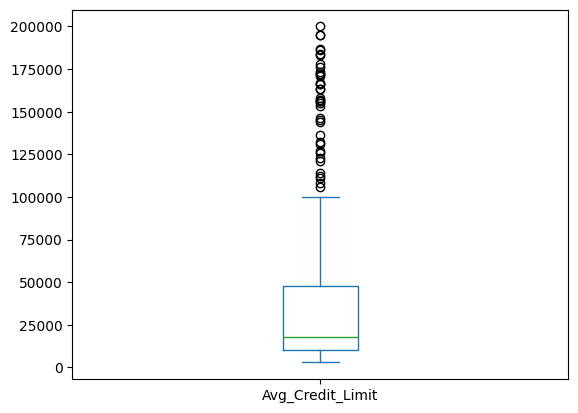

In [4]:
df_credit['Avg_Credit_Limit'].plot(kind = 'box')

Jumlah data sebelum dibuang outlier:  660
Jumlah data sebelum dibuang outlier:  621


<Axes: >

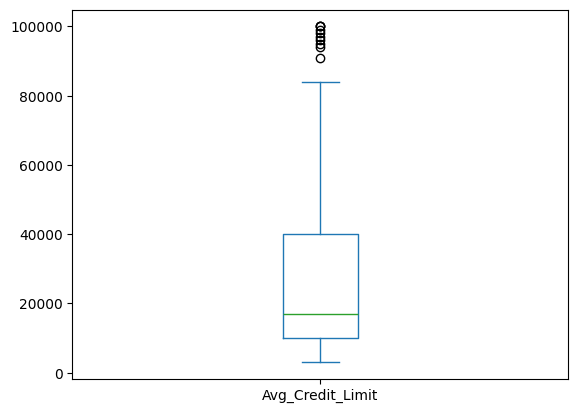

In [5]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df_in, Avg_Credit_Limit):
    if is_numeric_dtype(df_in[Avg_Credit_Limit]):
        q1 = df_in[Avg_Credit_Limit].quantile(0.25)
        q3 = df_in[Avg_Credit_Limit].quantile(0.75)

        iqr = q3 -q1
        batas_atas = q3 + (1.5 * iqr)
        batas_bawah = q1 - (1.5 * iqr)

        df_out = df_in.loc[(df_in[Avg_Credit_Limit] >= batas_bawah) & (df_in[Avg_Credit_Limit] <= batas_atas)]
        return df_out

df_credit_clean = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data sebelum dibuang outlier: ", df_credit.shape[0])
print("Jumlah data sebelum dibuang outlier: ", df_credit_clean.shape[0])

df_credit_clean['Avg_Credit_Limit'].plot(kind = 'box')

In [6]:
import warnings
warnings.filterwarnings('ignore')

from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state = 57)
vis = KElbowVisualizer(kMeansC, k = (2, 11))

vis.fit(df_credit_clean)
vis.show()

ModuleNotFoundError: No module named 'distutils'

Silhouette Score K-Means for  2  clusters:  0.7275517813087928
Silhouette Score K-Means for  3  clusters:  0.7077390094589705
Silhouette Score K-Means for  4  clusters:  0.7094276225317143
Silhouette Score K-Means for  5  clusters:  0.5986950720392292
Silhouette Score K-Means for  6  clusters:  0.6277644646724014
Silhouette Score K-Means for  7  clusters:  0.6213534164208421
Silhouette Score K-Means for  8  clusters:  0.6275593653509658
Silhouette Score K-Means for  9  clusters:  0.6115561113872093
Silhouette Score K-Means for  10  clusters:  0.5990139577749493


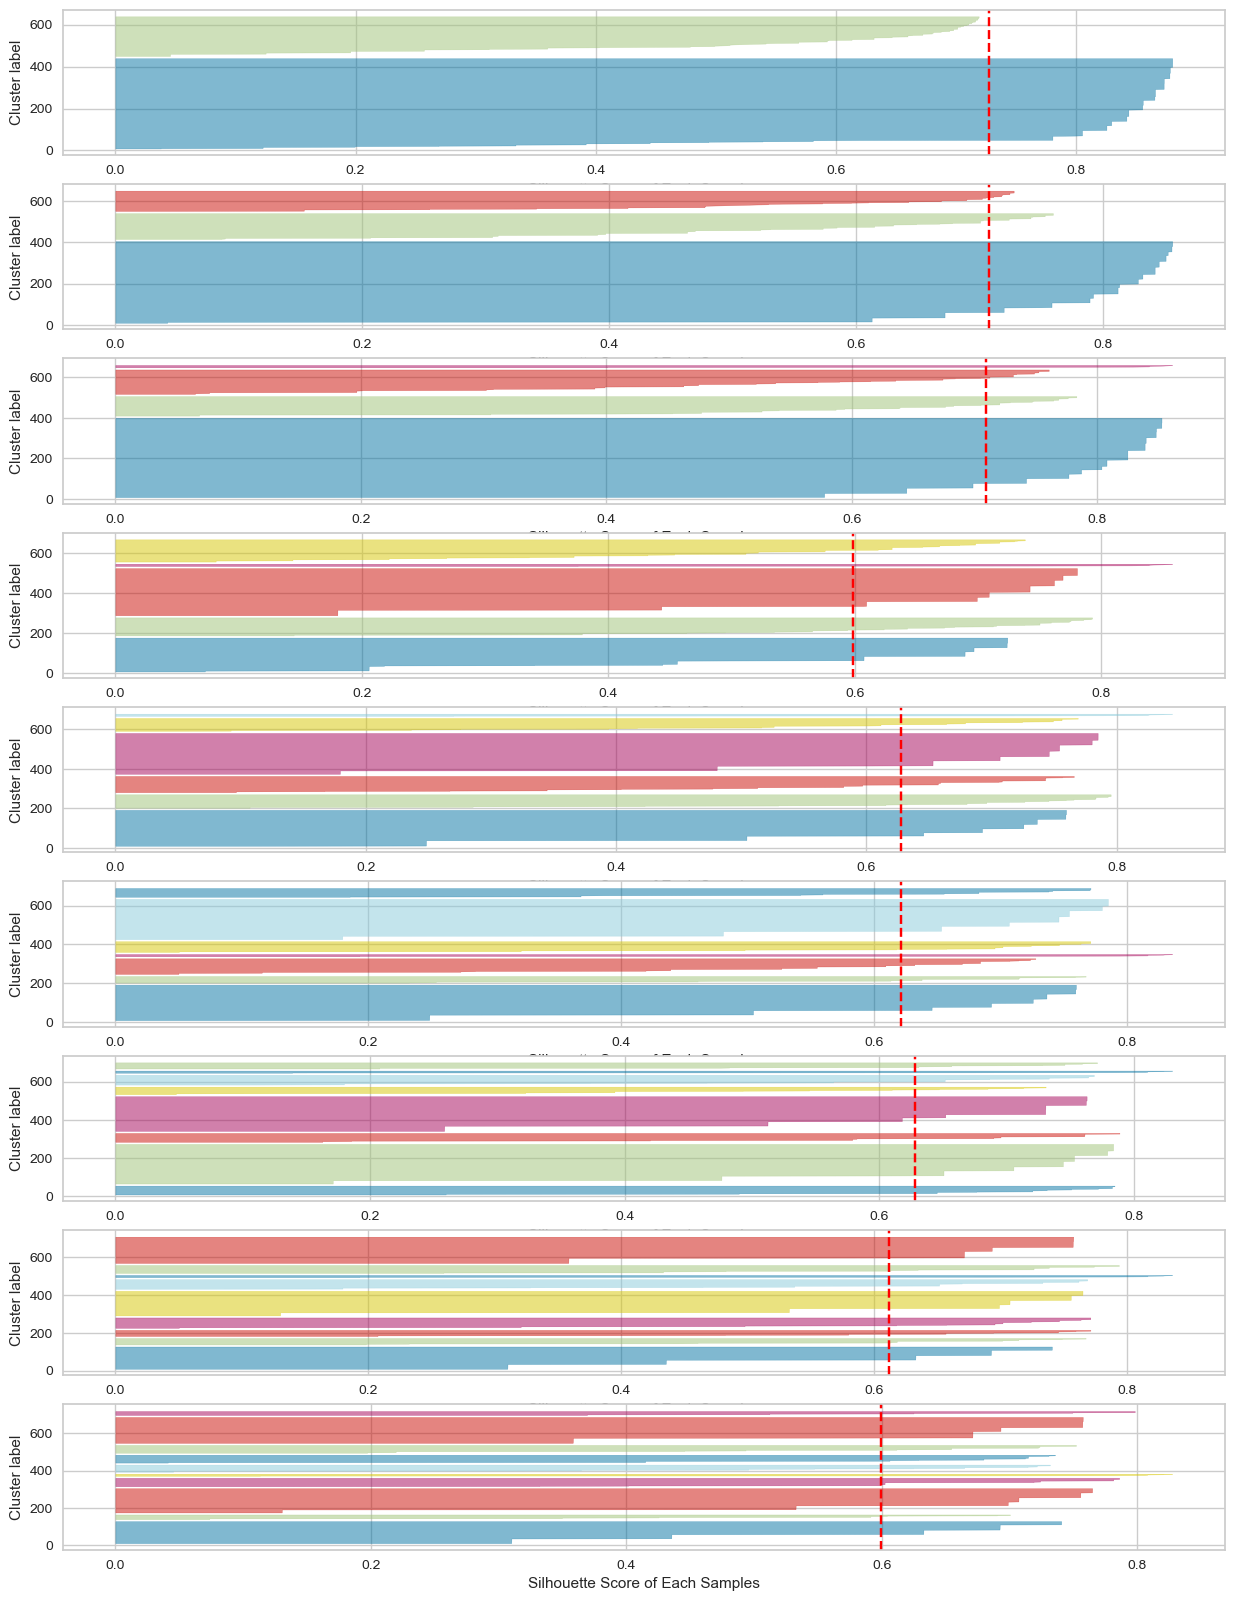

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9, 1, figsize = (15, 20))

for k in np.arange(2, 11):
    kMeansC = KMeans(n_clusters = k, init = 'k-means++', random_state = 57)
    KM_clusters = kMeansC.fit_predict(df_credit_clean)
    print("Silhouette Score K-Means for ", k, " clusters: ", silhouette_score(df_credit_clean, KM_clusters))

    sil_vis = SilhouetteVisualizer(kMeansC, colors = 'yellowbrick', ax = ax[k-2])
    sil_vis.fit(df_credit_clean)

    ax[k-2].set(xlabel = "Silhouette Score of Each Samples", ylabel = "Cluster label")

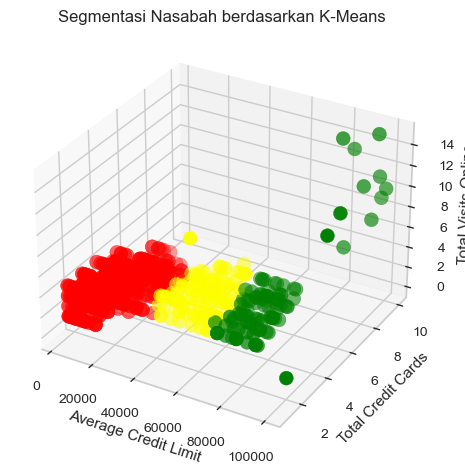

Silhouette Score K-Means: 0.708


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 57)
K_clusters = kmeans.fit_predict(df_credit_clean)

fig = plt.figure()
ax = plt.axes(projection = '3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6: 'cyan'}

ax.scatter(df_credit_clean['Avg_Credit_Limit'], df_credit_clean['Total_Credit_Cards'], df_credit_clean['Total_visits_online'], c = [cluster_colors[i] for i in K_clusters], s = 100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(df_credit_clean, K_clusters))

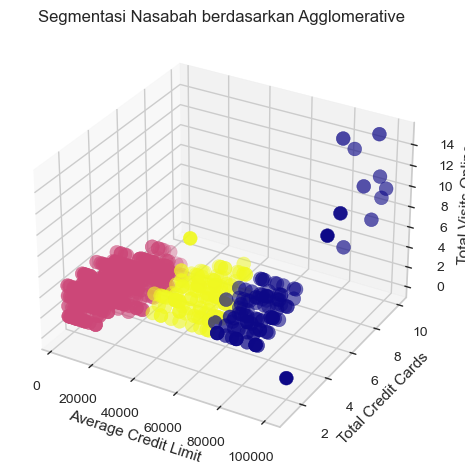

Silhouette Score K-Means: 0.705


In [ ]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')

AGG_clusters = AGG.fit_predict(df_credit_clean)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter(df_credit_clean['Avg_Credit_Limit'], df_credit_clean['Total_Credit_Cards'], df_credit_clean['Total_visits_online'], c = AGG_clusters, cmap = cmap, s = 100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(df_credit_clean, AGG_clusters))

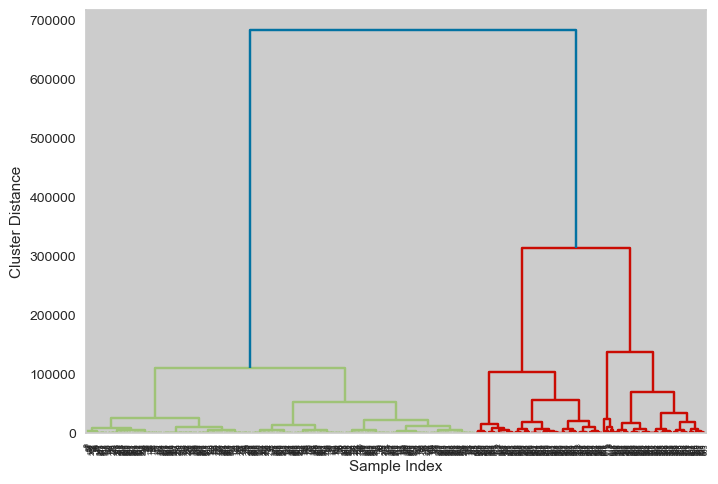

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(df_credit_clean, method = 'ward')
dendrogram(linkage_array)

plt.xlabel("Sample Index")
plt.ylabel("Cluster Distance")
plt.show()

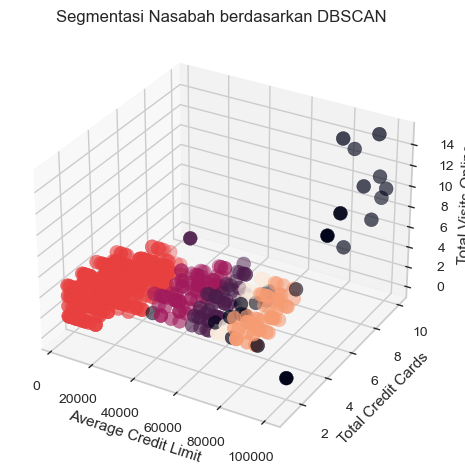

Silhouette Score K-Means: 0.657


In [ ]:
DBSC = DBSCAN(min_samples = 20, eps = 2500)

DBSC_clusters = DBSC.fit_predict(df_credit_clean)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.scatter(df_credit_clean['Avg_Credit_Limit'], df_credit_clean['Total_Credit_Cards'], df_credit_clean['Total_visits_online'], c = DBSC_clusters, cmap = cmap, s = 100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(df_credit_clean, DBSC_clusters))

In [ ]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump((kmeans), r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump((AGG), r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump((DBSC), r)

print("Model Berhasil Disimpan")

Model Berhasil Disimpan
